In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# srl-python-indicators
Python version of the indicators I developed for cTrader trading plataform, with improvements (paralel processing) and additional features compared to C# source code.

Only order_flow_ticks is plotted using the 'plotly' library, see 'notebooks' folder.

All others are plotted with mplfinance.

In [2]:
import pandas as pd
from order_flow_ticks import OrderFlowTicks

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

df_ticks.head(3)
df_ticks.tail(3)
len(df_ticks)

,ask,close,spread
datetime,,,
2025-05-15 00:00:00.650,41839.4,41838.3,1.1
2025-05-15 00:00:01.002,41839.8,41838.7,1.1
2025-05-15 00:00:01.252,41840.2,41839.1,1.1


,ask,close,spread
datetime,,,
2025-05-16 20:54:59.640,42376.7,42375.6,1.1
2025-05-16 20:54:59.841,42377.1,42376.0,1.1
2025-05-16 20:55:00.000,42377.9,42376.8,1.1


180399

In [3]:
df_ohlcv = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")
df_ohlcv.head(3)
df_ohlcv.tail(3)
len(df_ohlcv)

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:00:00,41838.7,41846.1,41833.8,41846.1,142.0
2025-05-15 00:01:00,41845.1,41853.3,41843.8,41852.1,90.0
2025-05-15 00:02:00,41853.5,41858.6,41853.5,41855.1,96.0


,open,high,low,close,volume
datetime,,,,,
2025-05-16 20:52:00,42462.1,42465.6,42447.1,42447.3,205.0
2025-05-16 20:53:00,42447.7,42449.8,42412.2,42414.2,260.0
2025-05-16 20:54:00,42412.5,42420.4,42371.4,42376.0,399.0


2631

In [4]:
from volume_profile import VolumeProfile, DistributionData
from tpo_profile import TpoProfile
from multi_vwap import MultiVwap

vp = VolumeProfile(df_ohlcv, None, 7, pd.Timedelta(hours=8), DistributionData.OHLC_No_Avg)
tpo = TpoProfile(df_ohlcv, 7, pd.Timedelta(hours=8))
vwap = MultiVwap(df_ohlcv)

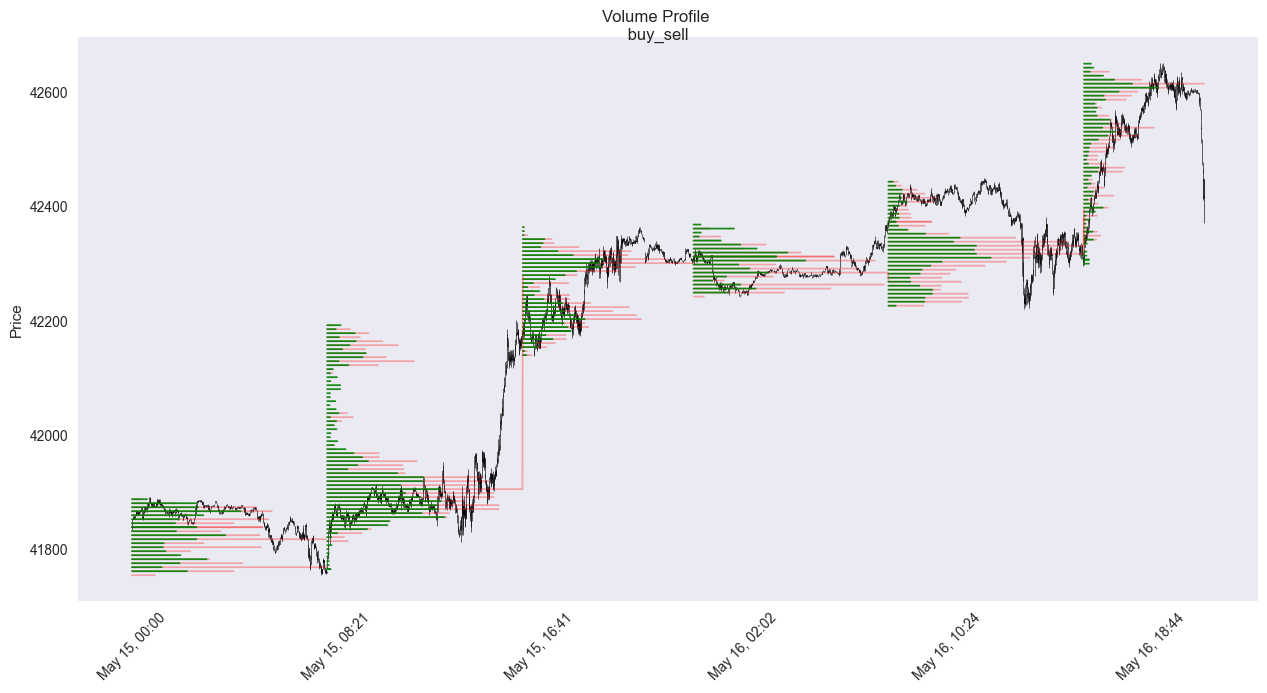

In [5]:
vp.plot('buy_sell')

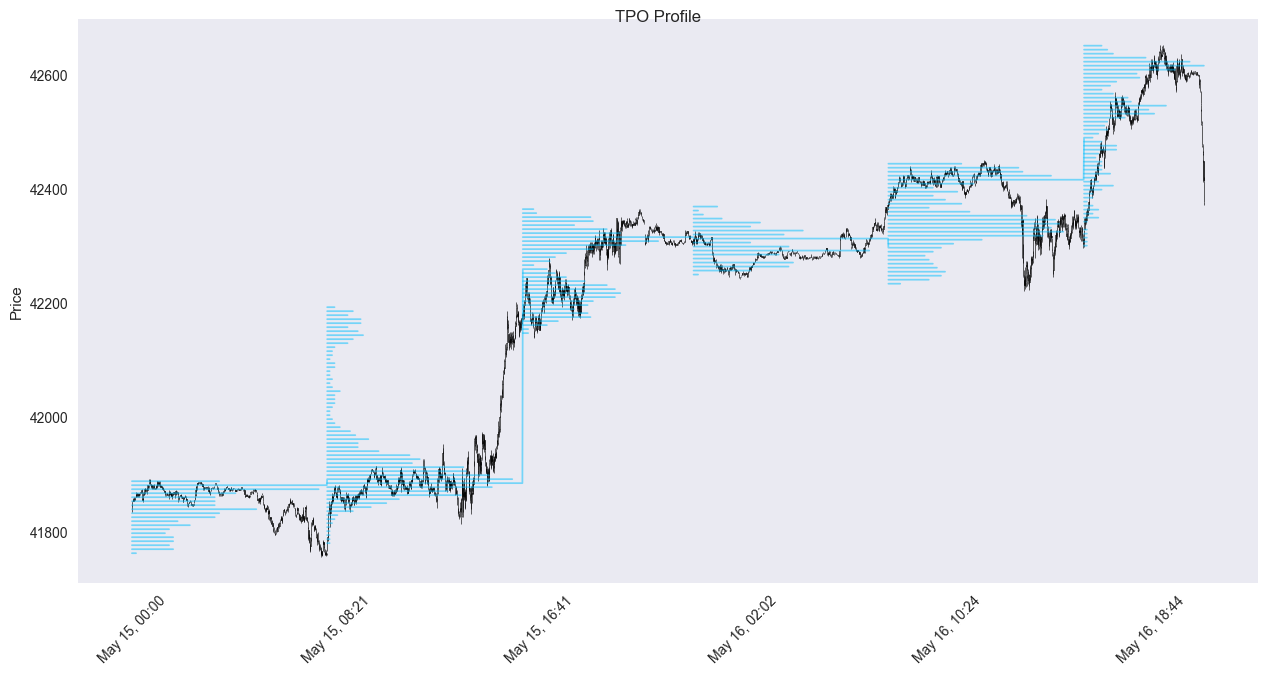

In [6]:
tpo.plot()

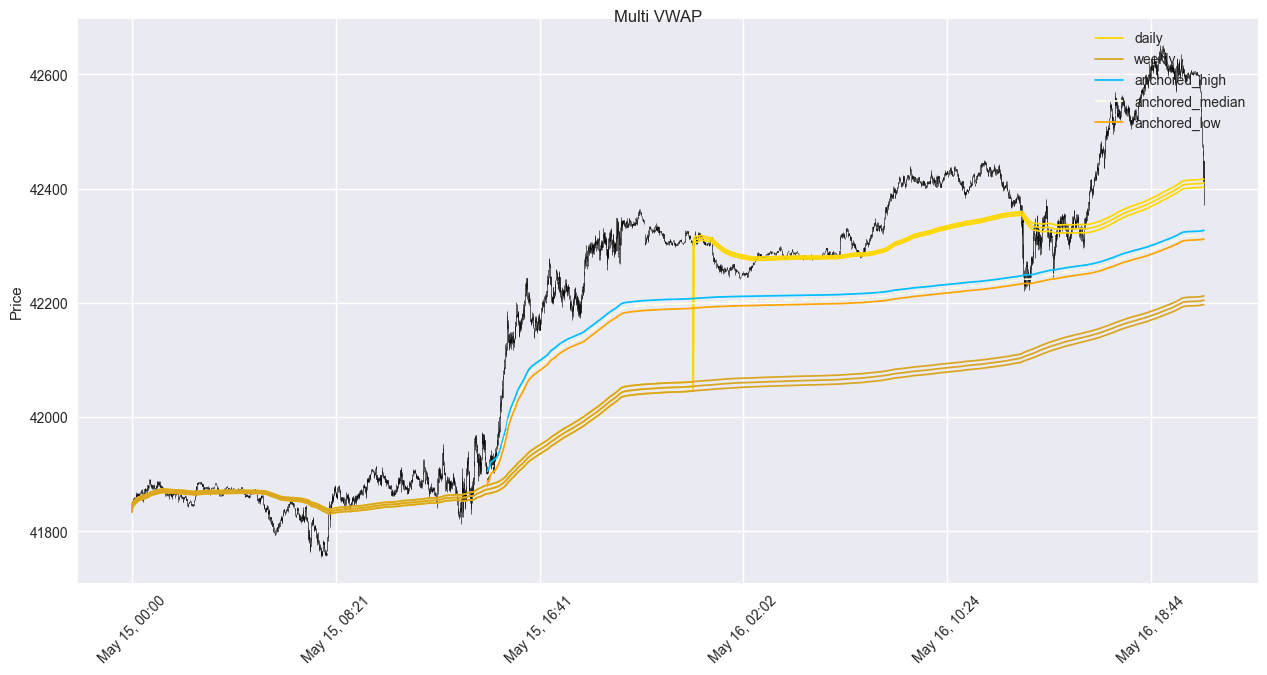

In [7]:
vwap.plot('2025-05-15 14:33:00')

Performing Full Analysis...
Calculating plots...
Completed! mpf.plot() was called, wait a moment!


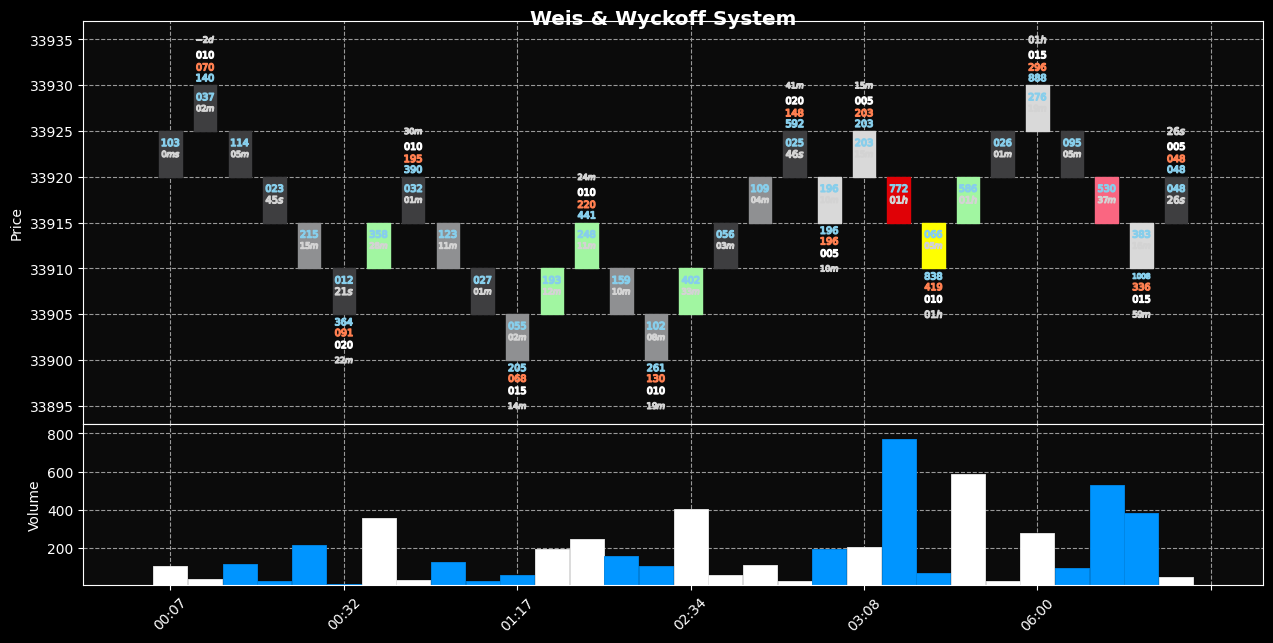

In [8]:
df_renko = pd.read_parquet(f"data/2023/US30_Re50_2023_normal.parquet")
from weis_wyckoff_system import WeisWyckoffSystem
ww = WeisWyckoffSystem(df_renko)
ww.plot(iloc_value=30)

Performing Wyckoff Analysis...
Calculating plots...
Completed! mpf.plot() was called, wait a moment!


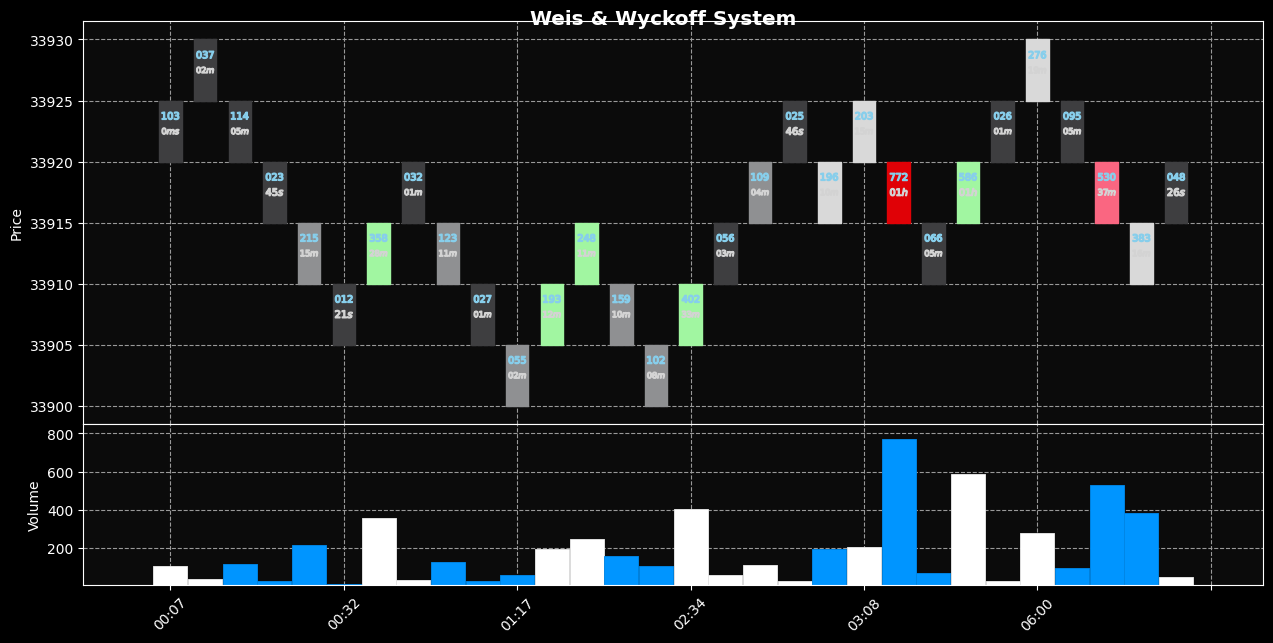

In [9]:
ww.plot_wyckoff(iloc_value=30)

Performing Wyckoff Analysis...
Calculating plots...
Completed! mpf.plot() was called, wait a moment!


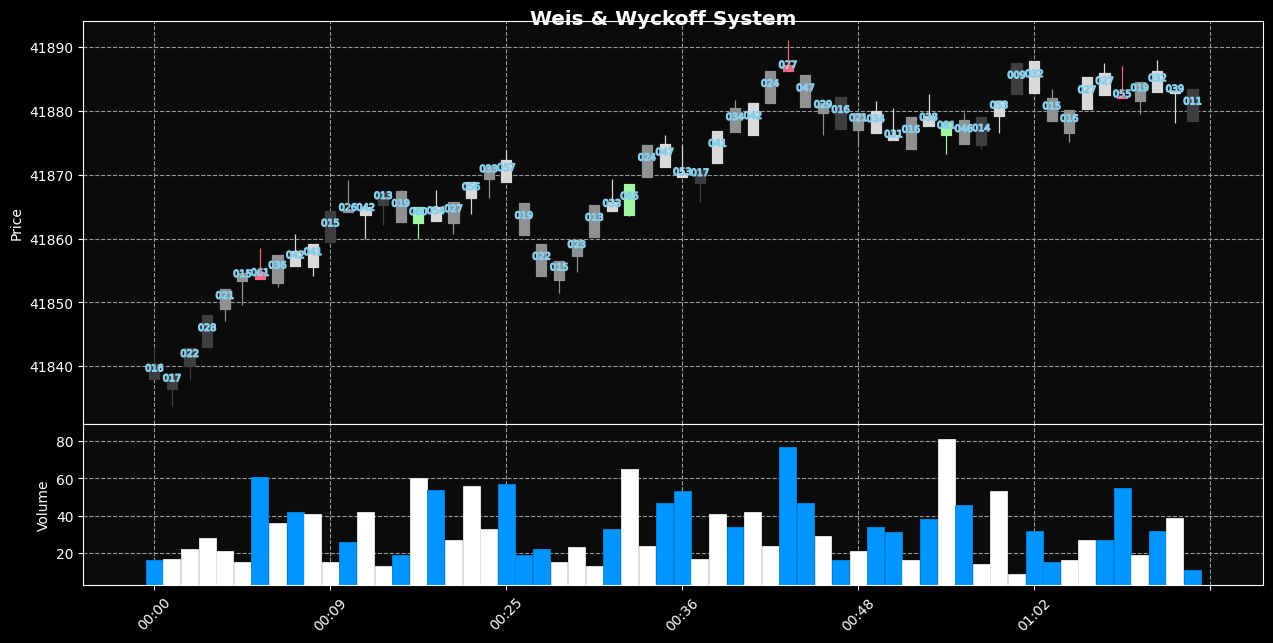

In [10]:
from rangedf import Range
r = Range(df_ticks, range_size=5)
ww = WeisWyckoffSystem(r.range_df())
ww.plot_wyckoff(60, plot_time=False)